In [ ]:
# Author: Lennard Alms // Compare to boilerplate to see whats different

In [ ]:
# edit this when working in a local environment
!wget "https://storage.googleapis.com/laubenthal_spatiolab/spatio_merged_data_iss.zip" --no-verbose
!unzip spatio_merged_data_iss.zip
!rm spatio_merged_data_iss.zip

2021-01-29 19:29:55 URL:https://storage.googleapis.com/laubenthal_spatiolab/spatio_merged_data_iss.zip [37282886/37282886] -> "spatio_merged_data_iss.zip" [1]
Archive:  spatio_merged_data_iss.zip
   creating: input/
  inflating: input/.DS_Store         
  inflating: __MACOSX/input/._.DS_Store  
  inflating: input/grid_ML.geojson   
  inflating: __MACOSX/input/._grid_ML.geojson  
  inflating: input/internet_ML.csv   
  inflating: __MACOSX/input/._internet_ML.csv  
  inflating: input/satelite.png      
  inflating: __MACOSX/input/._satelite.png  
  inflating: input/weather.csv       
  inflating: __MACOSX/input/._weather.csv  
  inflating: input/social_pulse_ML.csv  
  inflating: __MACOSX/input/._social_pulse_ML.csv  


In [ ]:
# edit this when working in a local environment
!rm -rf functions
!git clone https://github.com/markuslaubenthal/lab_st.git functions

Cloning into 'functions'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 543 (delta 164), reused 140 (delta 77), pack-reused 314
Receiving objects: 100% (543/543), 192.68 KiB | 6.88 MiB/s, done.
Resolving deltas: 100% (361/361), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, activations
from keras import backend as K
from keras.engine.topology import Layer
import tensorflow as tf
from scipy import stats
import seaborn as sns

In [ ]:
from functions.preprocessing.DataImport import load_and_scale_internet, load_and_scale_satelite, load_and_scale_social, load_and_scale_weather, create_space_invariant
from functions.preprocessing.DataGeneration import generate_dataset, generate_label, getFileHandler, get_datasets_from_file
from functions.postprocessing.ErrorEvaluation import calculate_errors

In [ ]:
f = getFileHandler("training_data.h5")

In [ ]:
internet, internet_origin, internet_min, internet_max = load_and_scale_internet('input/internet_ML.csv', f)
#satelite = load_and_scale_satelite('input/satelite.png', f)
#social = load_and_scale_social('input/social_pulse_ML.csv', f)
#weather = load_and_scale_weather('input/weather.csv', f)
#hour, weekday, holiday = create_space_invariant(f)

In [ ]:
# Basic data statistics 

In [ ]:
print(internet_origin[:,169:-168].mean(), internet_origin[:,-168:].mean())

753.3657 371.8474


In [ ]:
print(internet_origin[:,169:-168].std(), internet_origin[:,-168:].std())

753.3657 371.8474


In [ ]:
x = generate_dataset(internet, [1], 1, f, "closeness")
x = x[:].reshape(1487,100,100)
y = generate_label(internet, 1, f)
y = y[:].reshape(1487,100,100)

In [ ]:
# Correlation analysis

In [ ]:
self_mat = np.zeros((100,100))
for _y in range(100):
  for _x in range(100):
    self_mat[_y,_x] = stats.pearsonr(x[:,_y,_x], y[:,_y,_x])[0]

In [ ]:
def test(iy,ix):
  global mat
  global dmat
  global x
  global y
  high_dist = 0
  owenpc = stats.pearsonr(x[:,iy,ix], y[:,iy,ix])[0]
  highest = owenpc
  for _y in range(100):
    for _x in range(100):
      pc = stats.pearsonr(x[:,_y,_x], y[:,iy,ix])[0]
      if highest < pc:
        highest = pc
        high_dist = np.sqrt(((np.array([_y,_x])-np.array([iy,ix]))**2).sum())
  if owenpc < highest:
    mat[iy,ix] = highest
    dmat[iy,ix] = high_dist

In [ ]:
mat = np.zeros((100,100))
dmat = np.zeros((100,100))
for iy in range(100):
  for ix in range(100):
    test(iy,ix)
    if ix % 10 == 0: print(iy,ix)

0 0
0 10
0 20
0 30
0 40
0 50
0 60
0 70
0 80
0 90
1 0
1 10
1 20
1 30
1 40
1 50
1 60
1 70
1 80
1 90
2 0
2 10
2 20
2 30
2 40
2 50
2 60
2 70
2 80
2 90
3 0
3 10
3 20
3 30
3 40
3 50
3 60
3 70
3 80
3 90
4 0
4 10
4 20
4 30
4 40
4 50
4 60
4 70
4 80
4 90
5 0
5 10
5 20
5 30
5 40
5 50
5 60
5 70
5 80
5 90
6 0
6 10
6 20
6 30
6 40
6 50
6 60
6 70
6 80
6 90
7 0
7 10
7 20
7 30
7 40
7 50
7 60
7 70
7 80
7 90
8 0
8 10
8 20
8 30
8 40
8 50
8 60
8 70
8 80
8 90
9 0
9 10
9 20
9 30
9 40
9 50
9 60
9 70
9 80
9 90
10 0
10 10
10 20
10 30
10 40
10 50
10 60
10 70
10 80
10 90
11 0
11 10
11 20
11 30
11 40
11 50
11 60
11 70
11 80
11 90
12 0
12 10
12 20
12 30
12 40
12 50
12 60
12 70
12 80
12 90
13 0
13 10
13 20
13 30
13 40
13 50
13 60
13 70
13 80
13 90
14 0
14 10
14 20
14 30
14 40
14 50
14 60
14 70
14 80
14 90
15 0
15 10
15 20
15 30
15 40
15 50
15 60
15 70
15 80
15 90
16 0
16 10
16 20
16 30
16 40
16 50
16 60
16 70
16 80
16 90
17 0
17 10
17 20
17 30
17 40
17 50
17 60
17 70
17 80
17 90
18 0
18 10
18 20
18 30
18 40
18 50
18 

In [ ]:
dmat[np.where(mat > 0)].mean() # mean distance

5.111499050955601

In [ ]:
mat[np.where(mat > 0)].shape # number of cells where self correlation is not the highest correlation

(4256,)

In [ ]:
mat[np.where(mat > 0)].mean() # mean correlation for the cells where self correlation is not the highest correlation

0.8968292652498794

In [ ]:
self_mat[np.where(mat > 0)].mean() # mean self correlation for the cells where self correlation is not the highest correlation

0.8897785364241085

In [ ]:
self_mat[np.where(mat == 0)].mean() # mean self correlation for the cells where self correlation is the highest correlation

0.9248457904955263

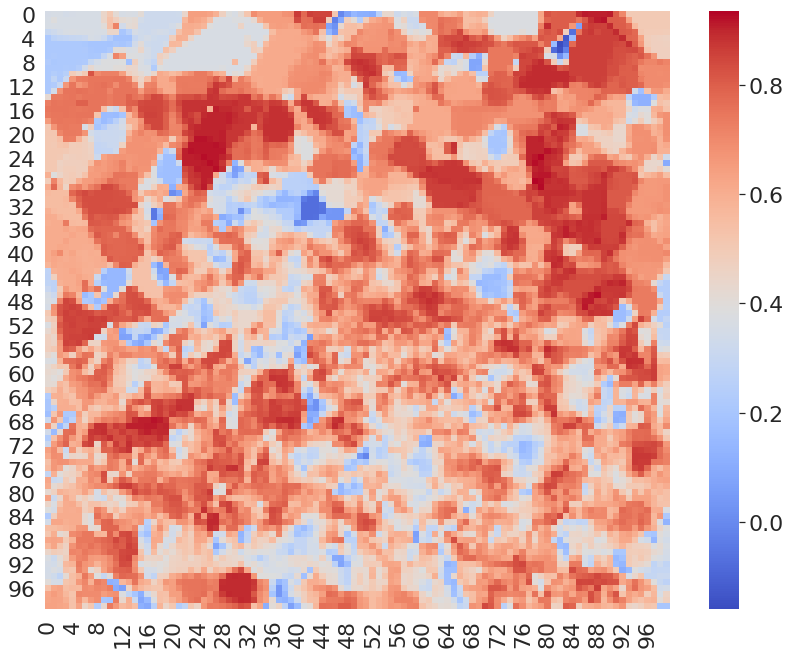

In [ ]:
plt.figure(figsize=(14,11))
#sns.set(font_scale=2)
sns.heatmap(pd.DataFrame(corr), cmap='coolwarm')

In [ ]:
# Other plots for the paper

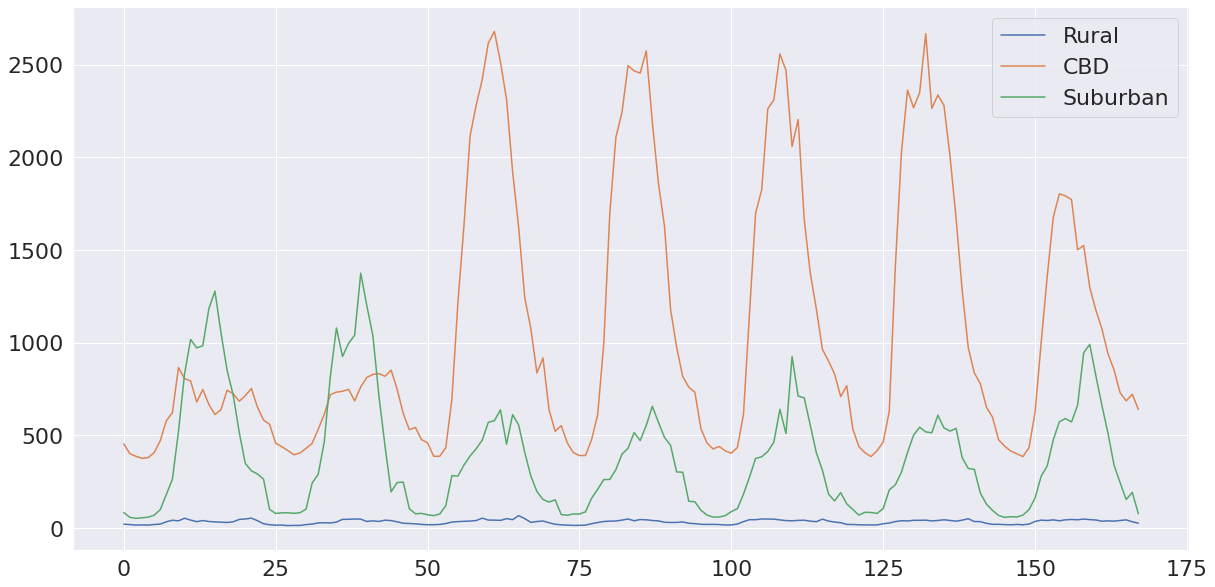

In [ ]:
# reference plot
plt.figure(figsize=(20,10))
plt.plot(range(base[0,24*8:24*15].shape[0]), base[1111,24*8:24*15], label='Rural')
plt.plot(range(base[0,24*8:24*15].shape[0]), base[4051,24*8:24*15], label='CBD')
plt.plot(range(base[0,24*8:24*15].shape[0]), base[3421,24*8:24*15], label='Suburban')
#plt.plot(range(400), pred[2878,100:500], label='pred')
plt.legend()

In [ ]:
px,pz,py = np.zeros((10000)), np.zeros((10000)), np.zeros((10000))
for i in range(10000):
  py[i] = i // 100
  px[i] = i % 100
dx, dy, dz = np.ones((10000)), np.ones((10000)), base[:,88] 

In [ ]:
import matplotlib.colors as colors
import matplotlib.cm as cm

offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
color_values = cm.Reds(norm(fracs.tolist()))

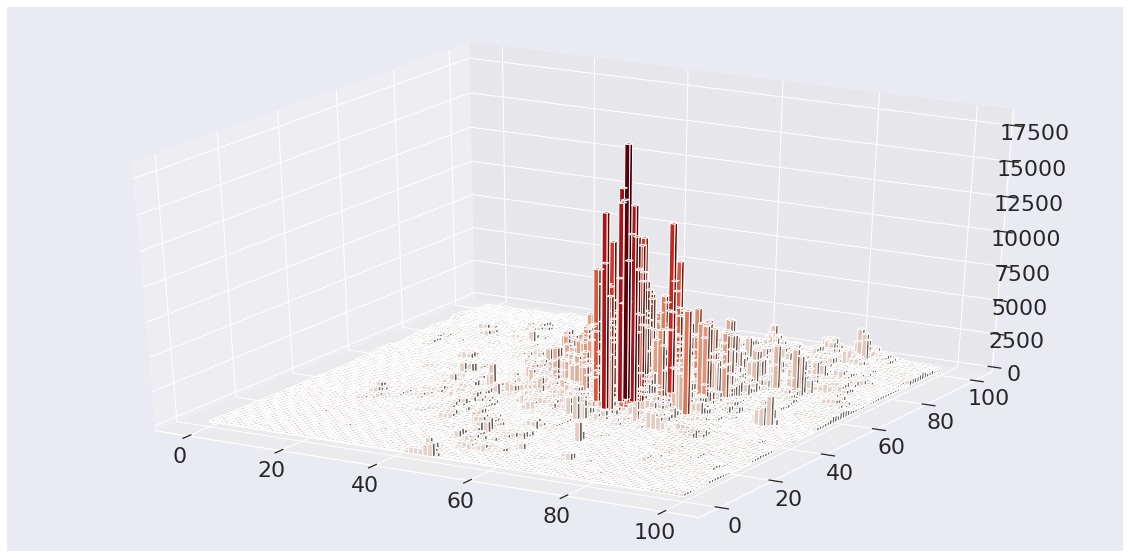

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, projection='3d')

ax1.bar3d(px, py, pz, dx, dy, dz, color=color_values)


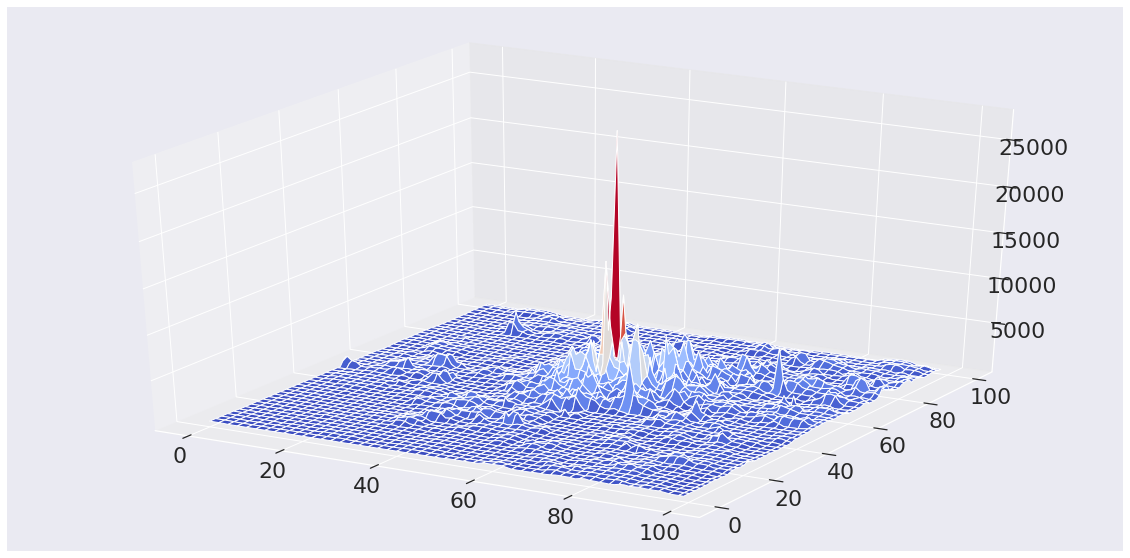

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, projection='3d')
ddx = np.outer(np.arange(100), np.ones((100)))
ddy = ddx.copy().T
ddz = base[:,15].reshape(100,100)
ax1.plot_surface(ddx,ddy,ddz, cmap='coolwarm')